In [ ]:
import dos
path = './dos/AcO_M1Pos_noFEM_reorder'

In [ ]:
# ini
sim = dos.DOS(path, 10, show_timing = 2)

In [2]:
SAVE = False

if SAVE:
    sim.start()
    sim.join()
    sim.terminate()

#### Backup simulated Data

In [3]:
import pickle

if SAVE:
    with open('./logs/trivial_AcOM1Pos(reorder).txt', 'wb') as f:
        pickle.dump(sim.logs.entries, f)
        logs = sim.logs.entries
else:
    logs = pickle.load( open( './logs/trivial_AcOM1Pos(reorder).txt', "rb" ) )

# plot logs
---

In [4]:
import matplotlib.pyplot as plt
try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

import numpy as np

logs

{'wfs48': {'M12_RBM': <dos.dos.Entry at 0x7f2580601290>},
 'AcO_controller': {'M1 Txyz': <dos.dos.Entry at 0x7f2551557f50>,
  'M1 Rxyz': <dos.dos.Entry at 0x7f2551563510>,
  'M2 Txyz': <dos.dos.Entry at 0x7f2551563a90>,
  'M2 Rxyz': <dos.dos.Entry at 0x7f255156a050>,
  'M1 BM': <dos.dos.Entry at 0x7f255156a5d0>},
 'M1PosHP0': {'M1PosHP0_out': <dos.dos.Entry at 0x7f255156ab90>}}

#### BM

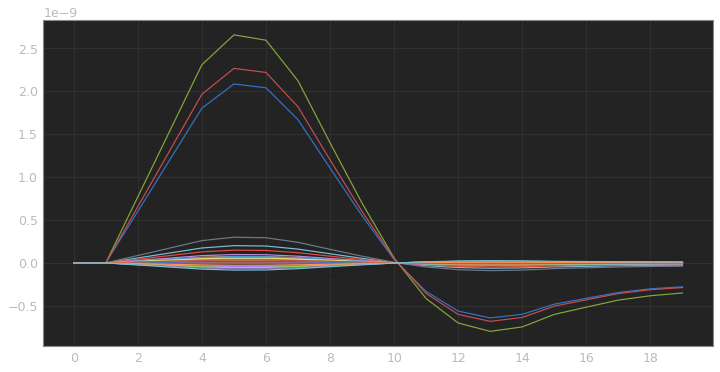

In [5]:
%matplotlib inline

BM = logs['AcO_controller']['M1 BM'].timeSeries[1]
time = logs['M1PosHP0']['M1PosHP0_out'].timeSeries[0]
plt.figure(figsize=(12,6))
plt.xticks(np.arange(0, 20, 2))
for k in range(BM[0,:,:].shape[0]):
    plt.plot(time[::2000], BM[0,k,:])
plt.show()

#### x_hat

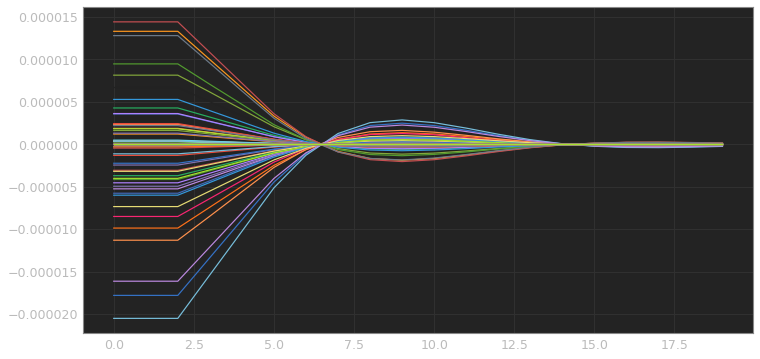

In [6]:
wfs = logs['wfs48']['M12_RBM'].timeSeries[1]

plt.figure(figsize=(12,6))
plt.plot(wfs)
plt.show()

#### Hardpoints

In [8]:
Txyz = logs['AcO_controller']['M1 Txyz'].timeSeries[1]
Rxyz = logs['AcO_controller']['M1 Rxyz'].timeSeries[1]
TRxyz = np.concatenate((Txyz, Rxyz), axis = 1)

M1Pos_out = logs['M1PosHP0']['M1PosHP0_out'].timeSeries[1]
M1Pos_out_r = np.stack(np.split(M1Pos_out, 7, axis = 1), axis = 2)

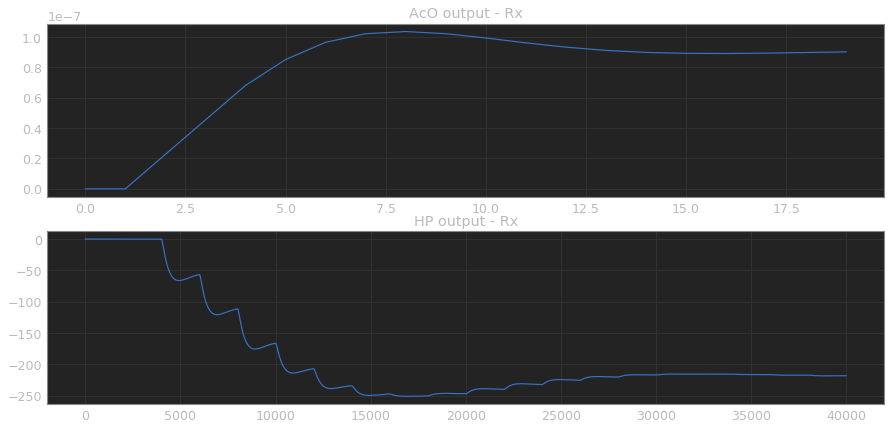

In [9]:
# Select
seg =  7    #1 - 7
rbm = 'Rx'  # Tx Ty Tz Rx Ry Rz

# Plot ------
table = ['Tx','Ty','Tz','Rx','Ry','Rz']
rbm_index = table.index(rbm)

plt.figure(figsize=(15,7))
ax1 = plt.subplot(2,1,1)
ax1.set_title('AcO output - ' + rbm)
plt.plot(TRxyz[seg - 1, rbm_index,:])
ax2 = plt.subplot(2,1,2)
ax2.set_title('HP output - ' + rbm)
plt.plot(M1Pos_out_r[:, rbm_index, seg - 1])
plt.show()

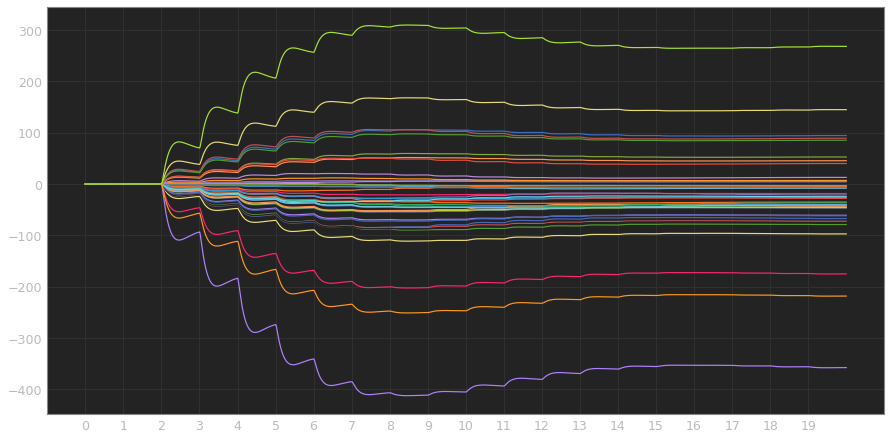

In [10]:
plt.figure(figsize = (15,7.5))
plt.plot(time, M1Pos_out)
plt.xticks(np.arange(0,20,1))
plt.show()

/home/felipe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


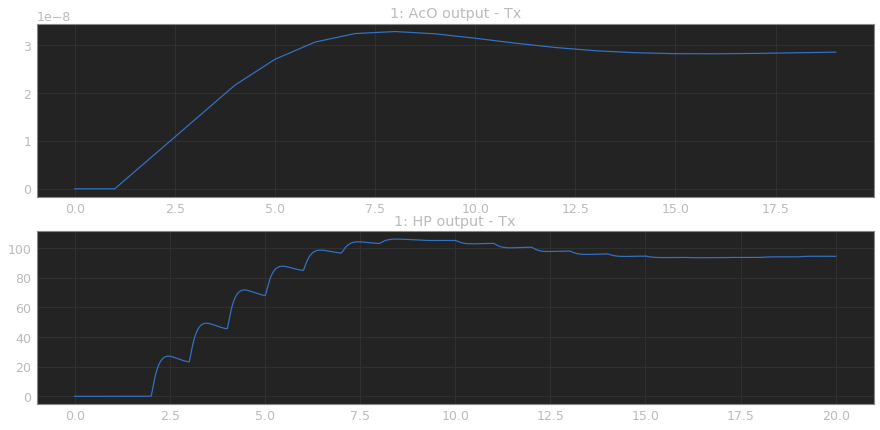

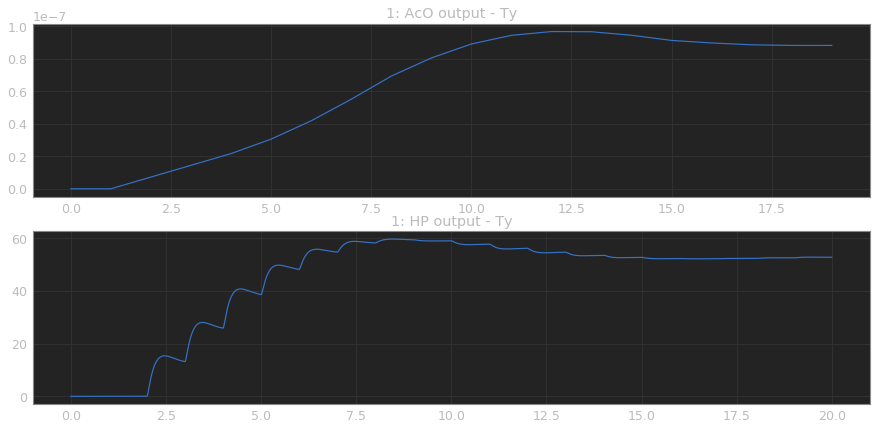

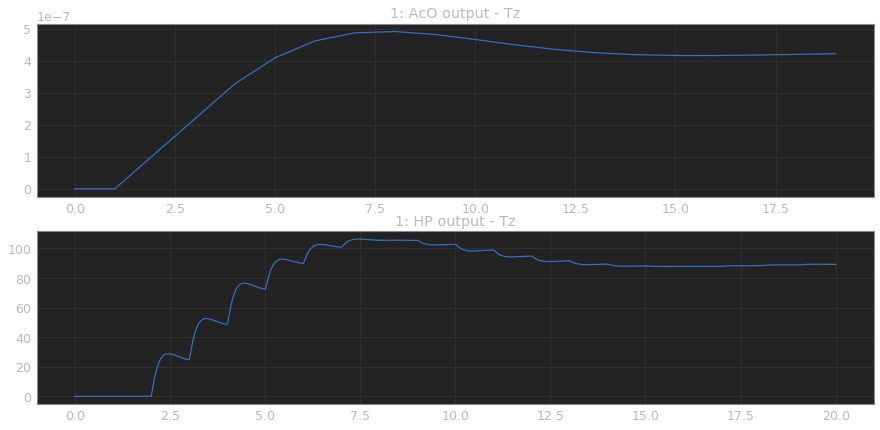

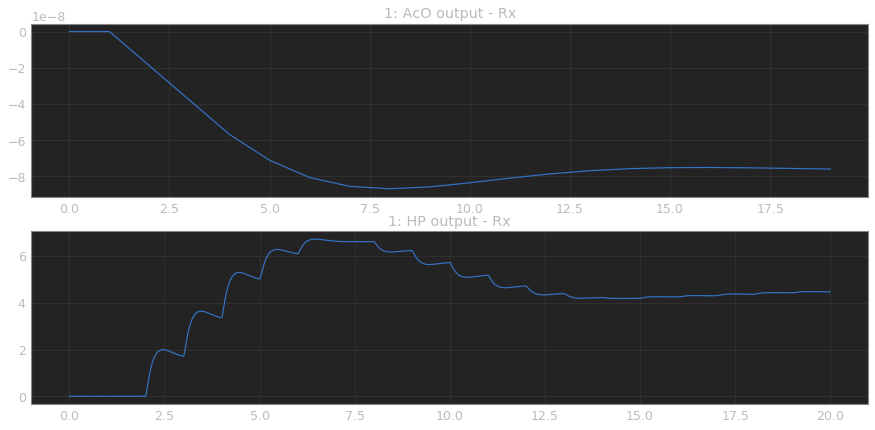

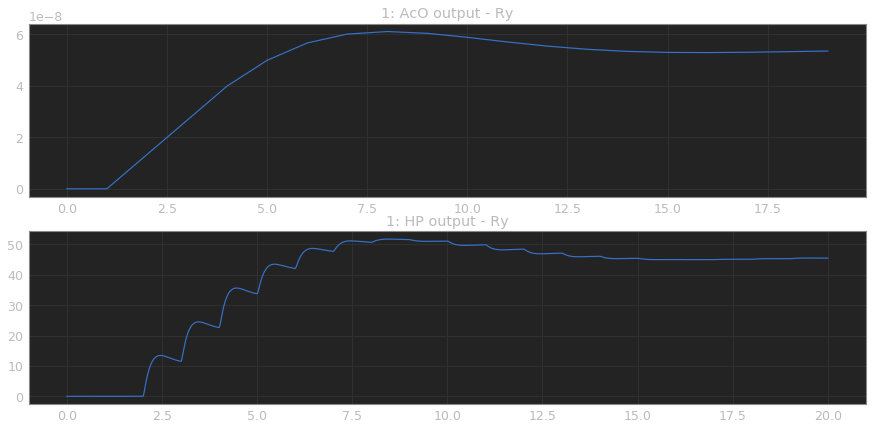

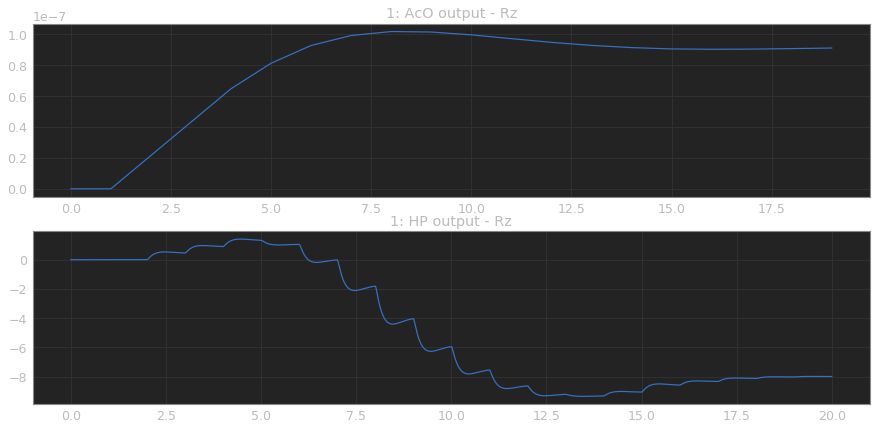

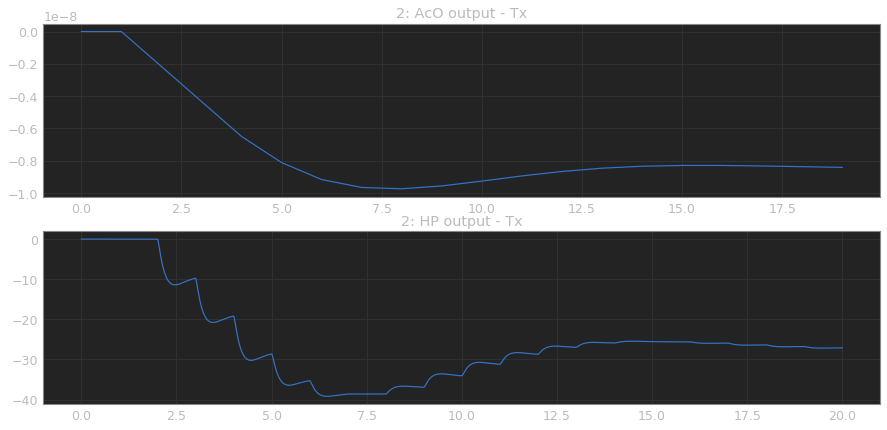

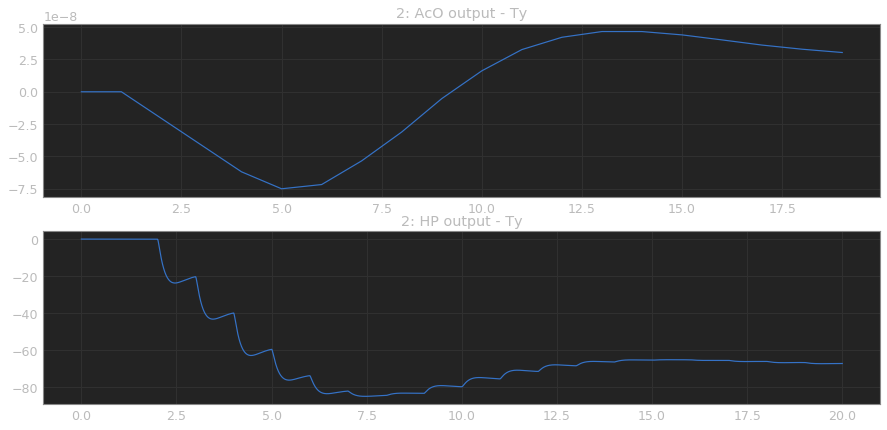

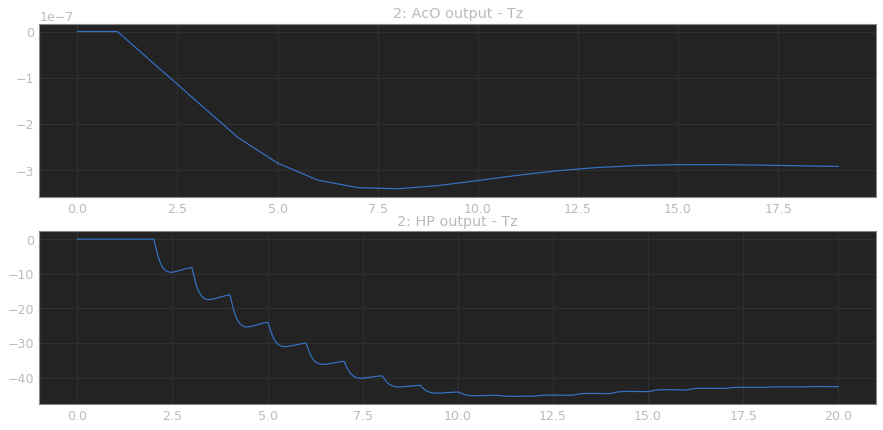

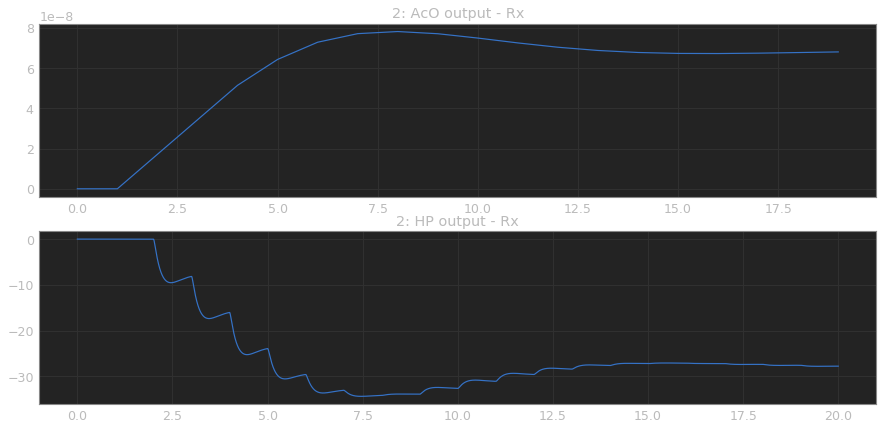

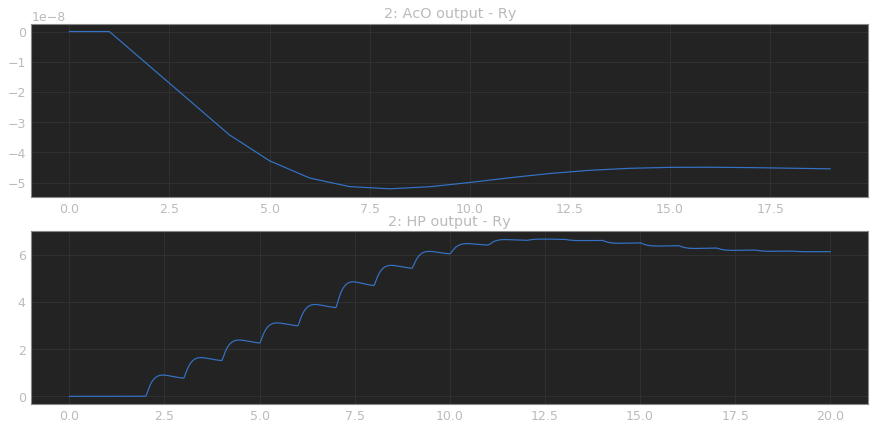

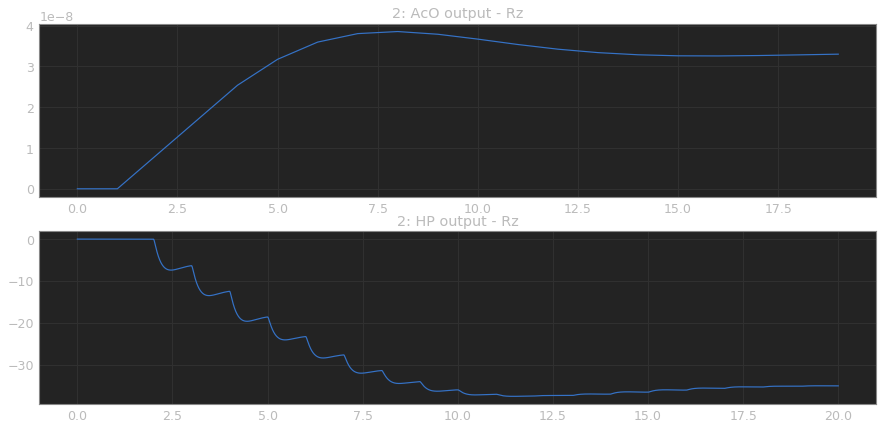

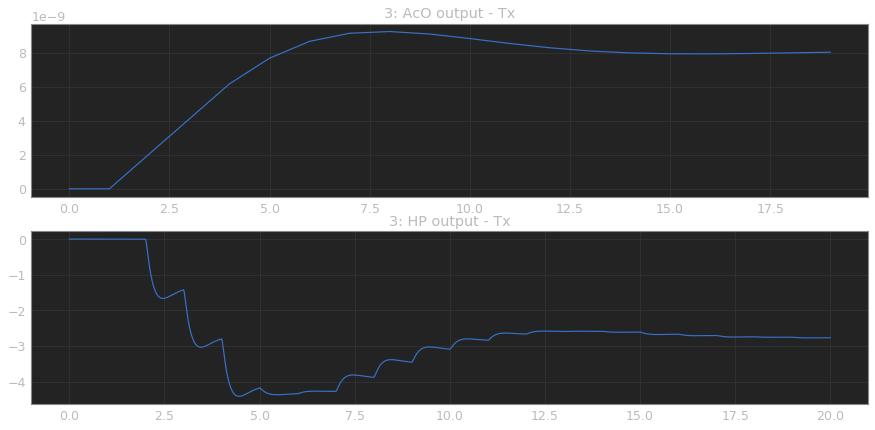

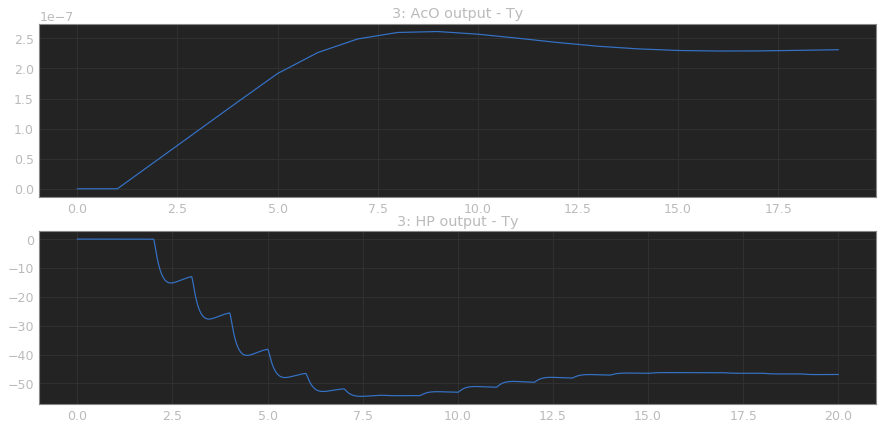

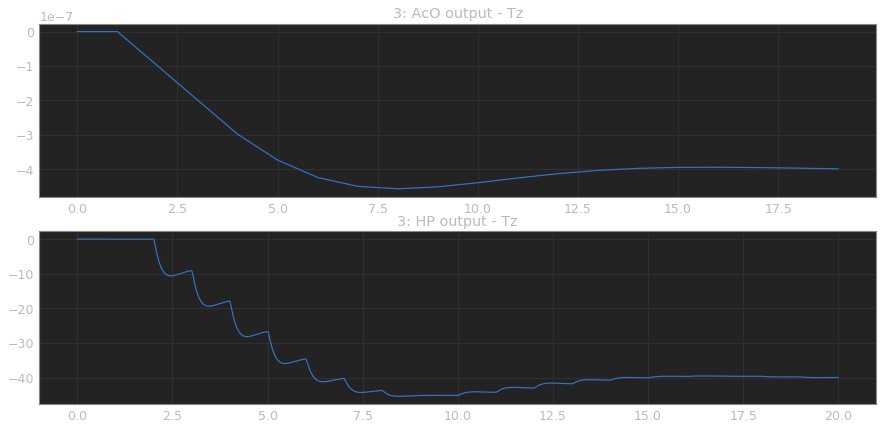

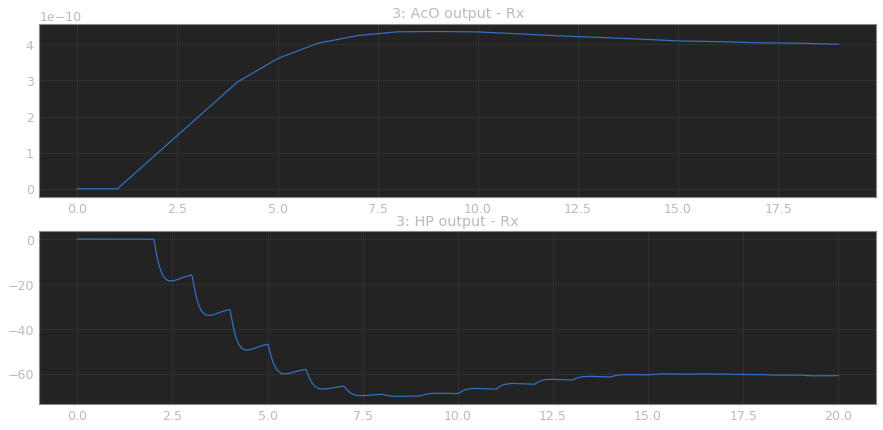

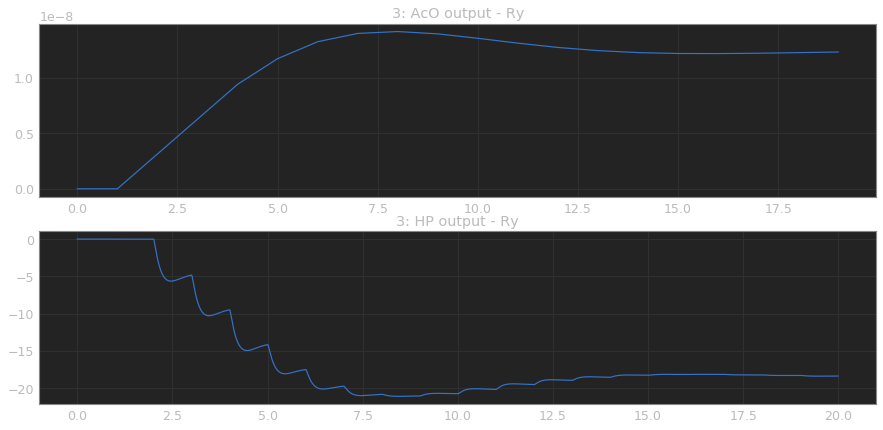

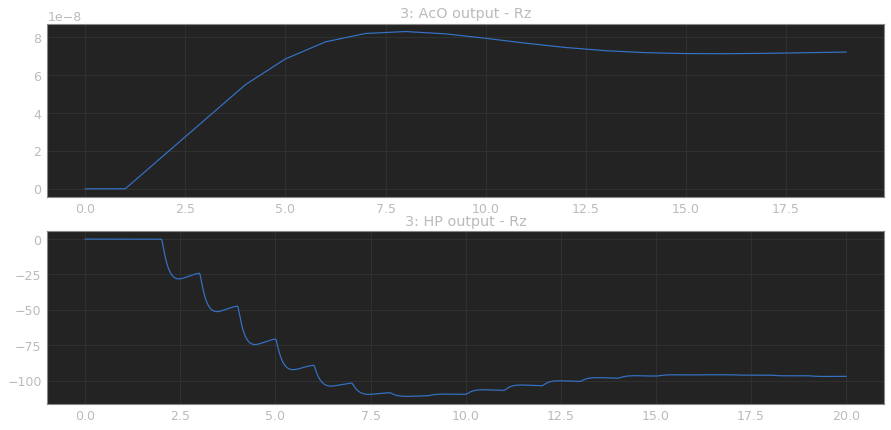

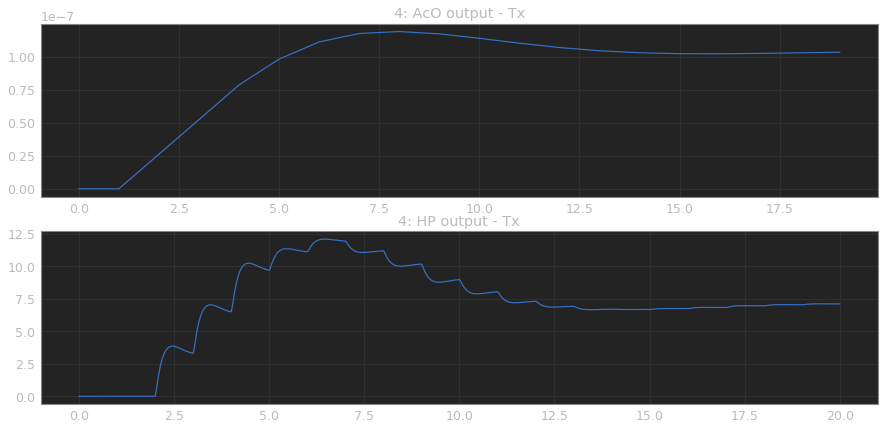

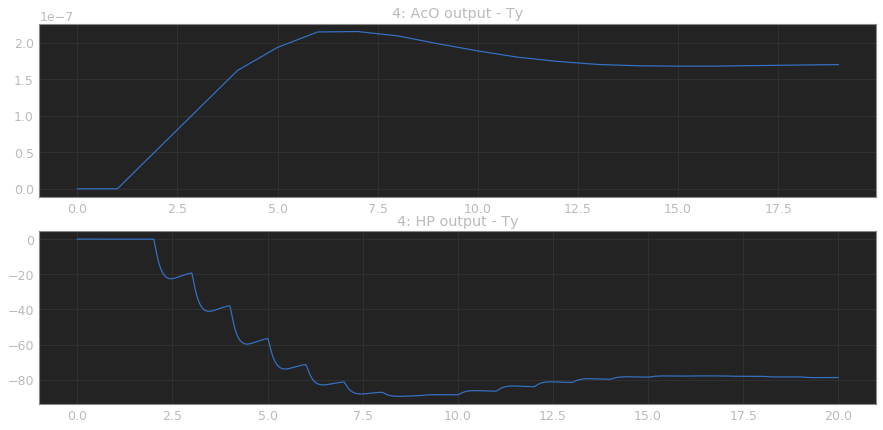

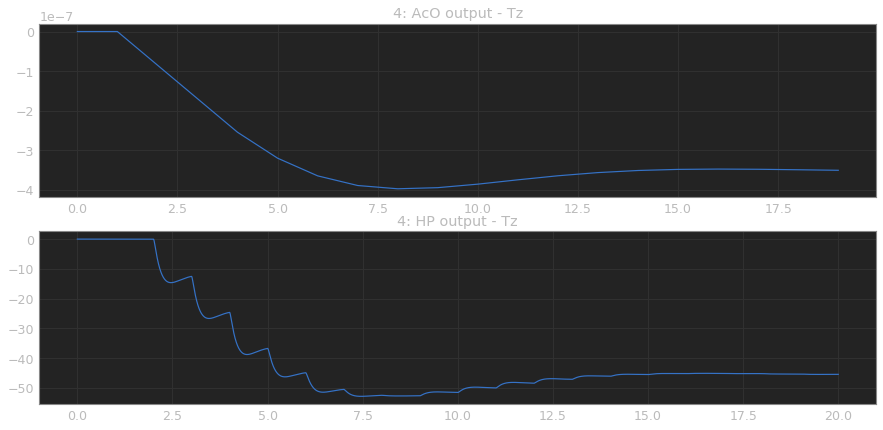

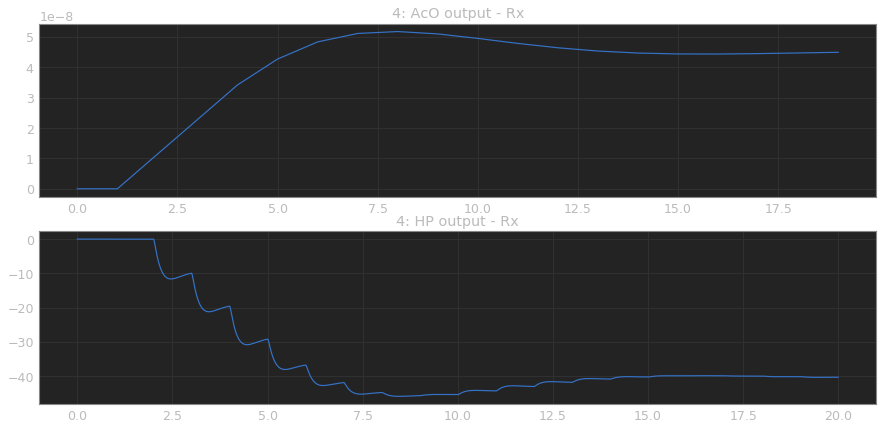

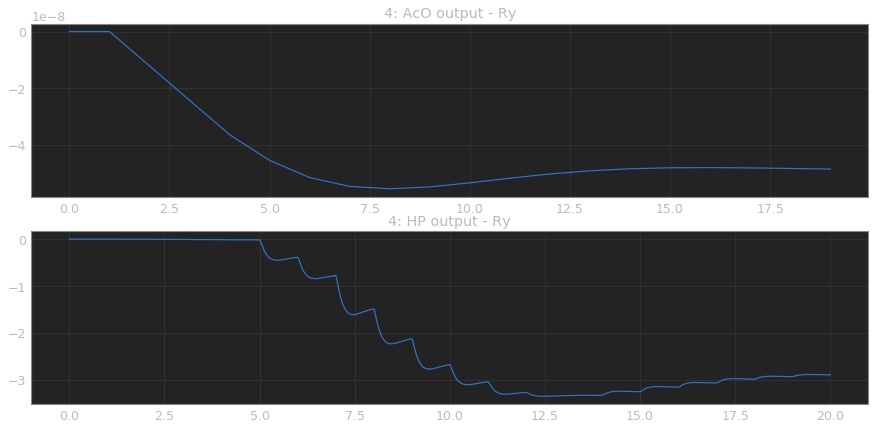

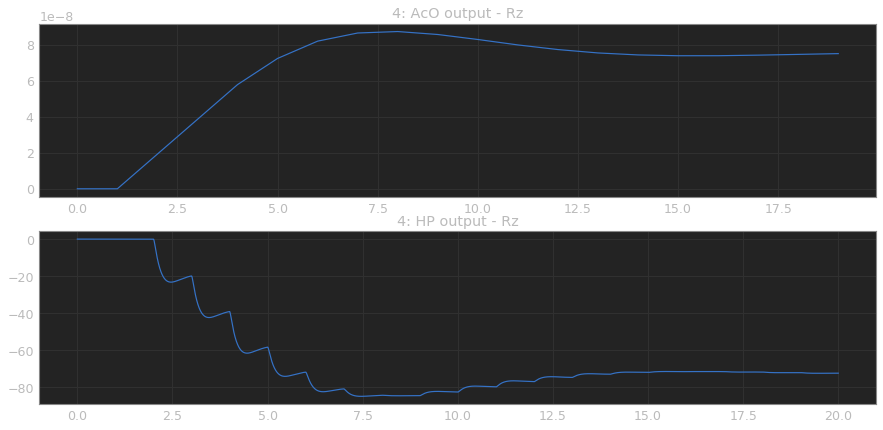

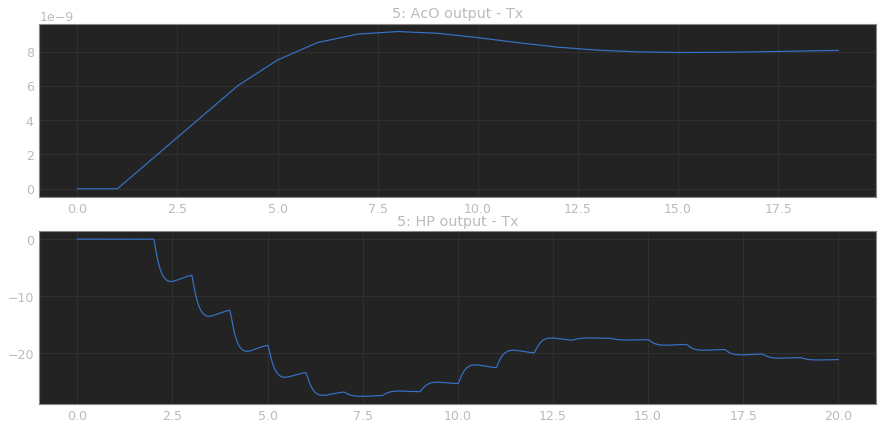

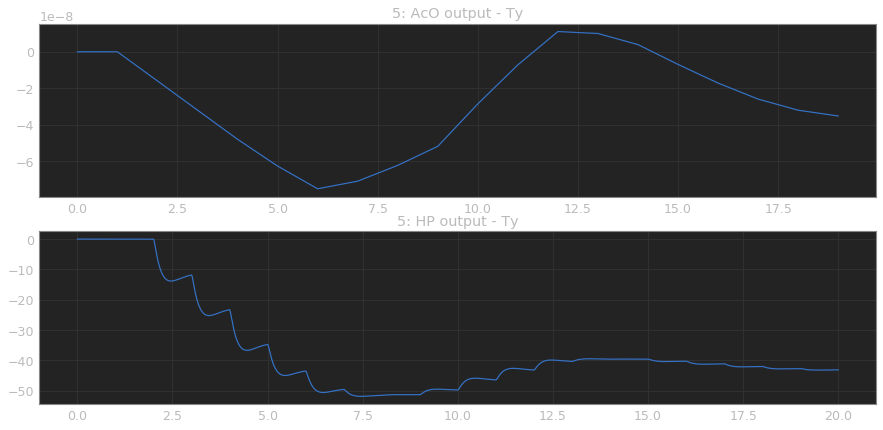

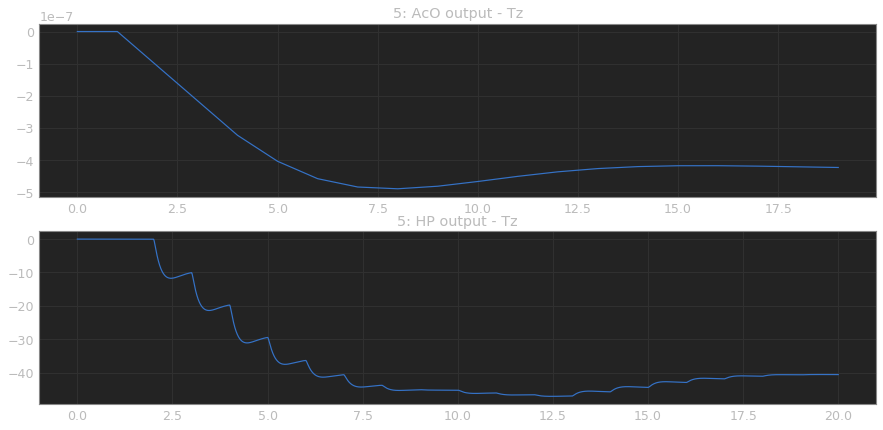

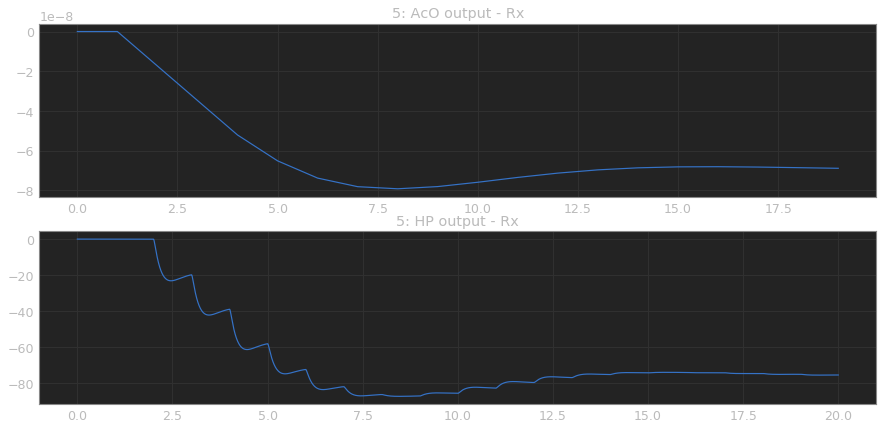

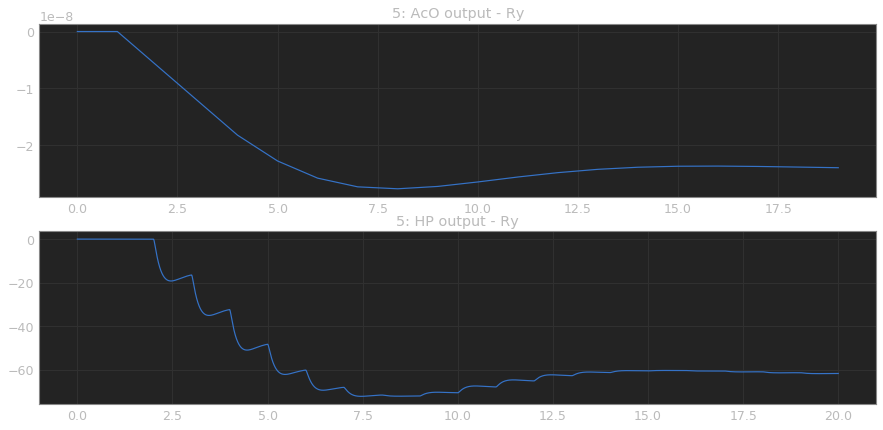

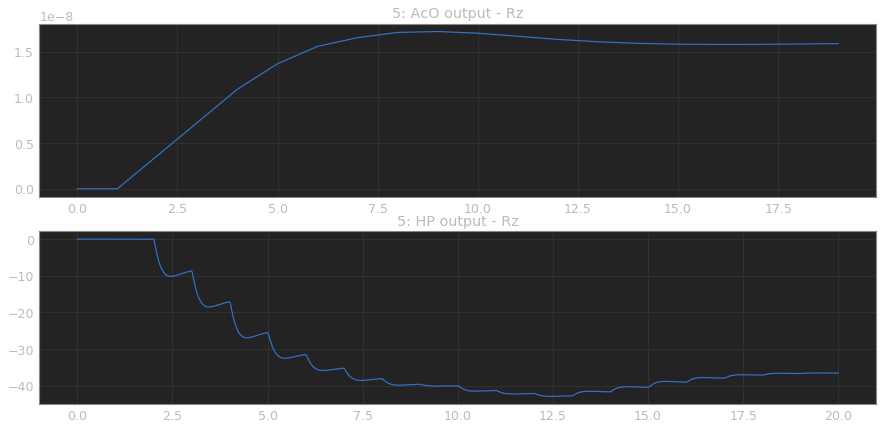

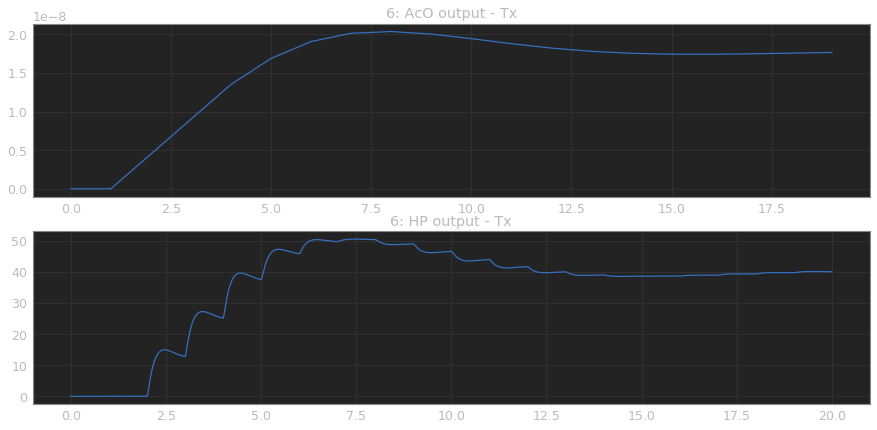

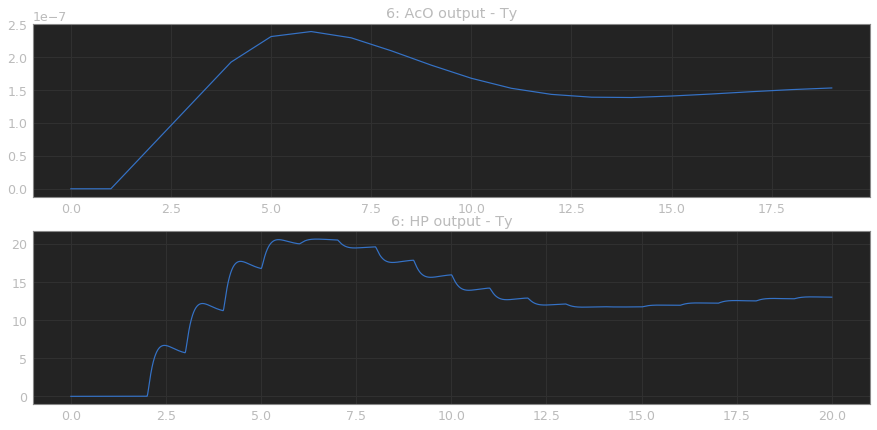

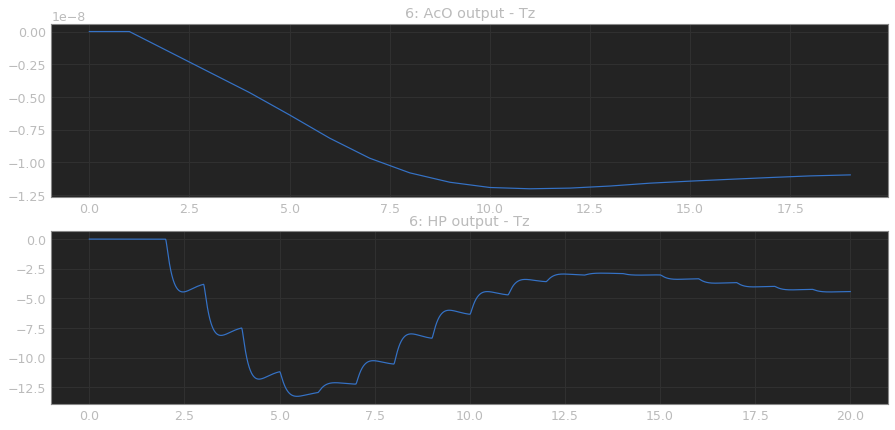

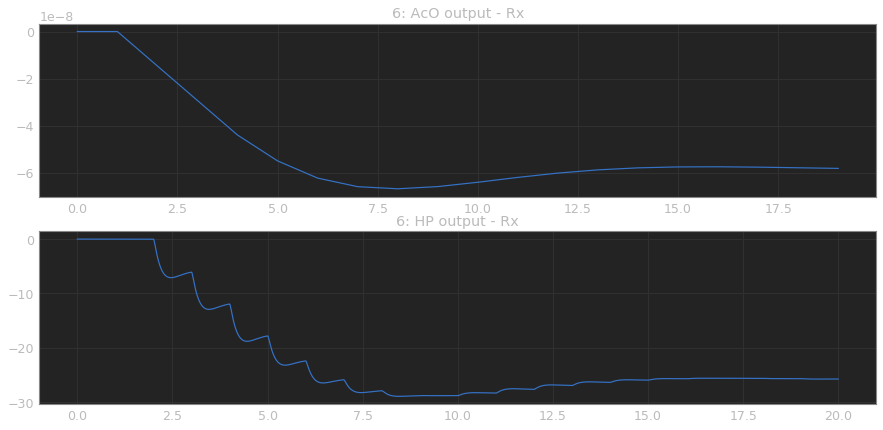

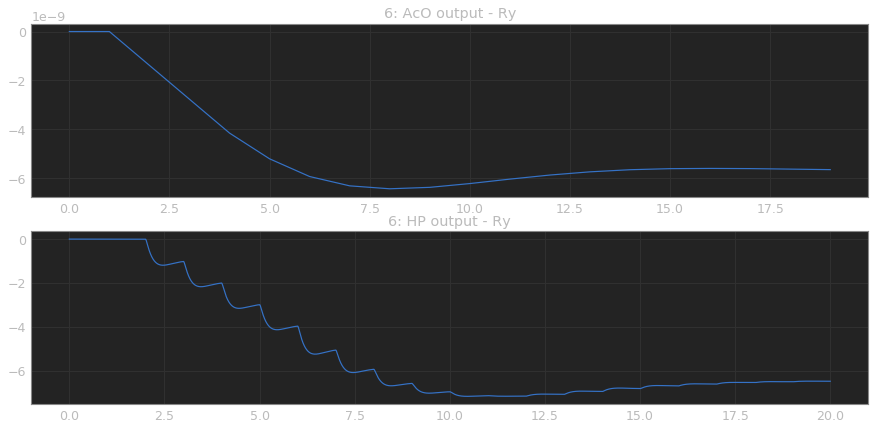

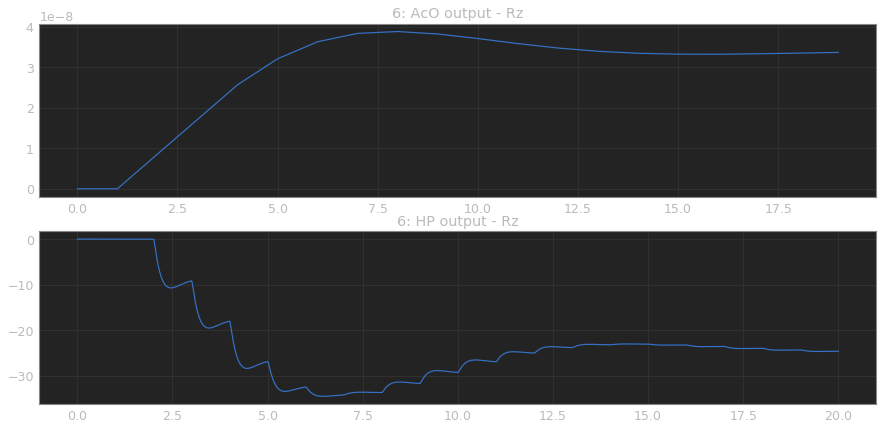

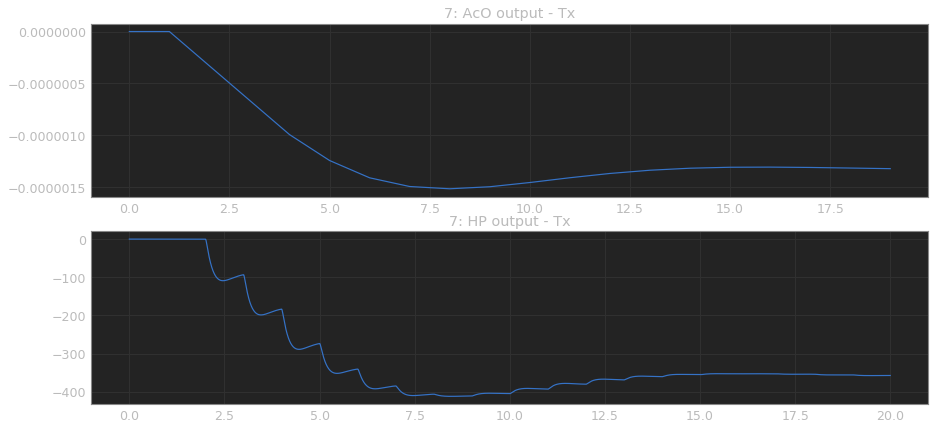

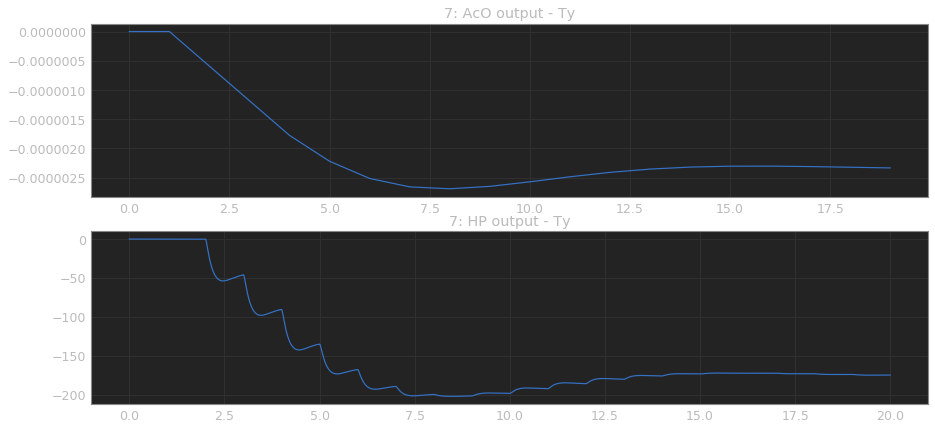

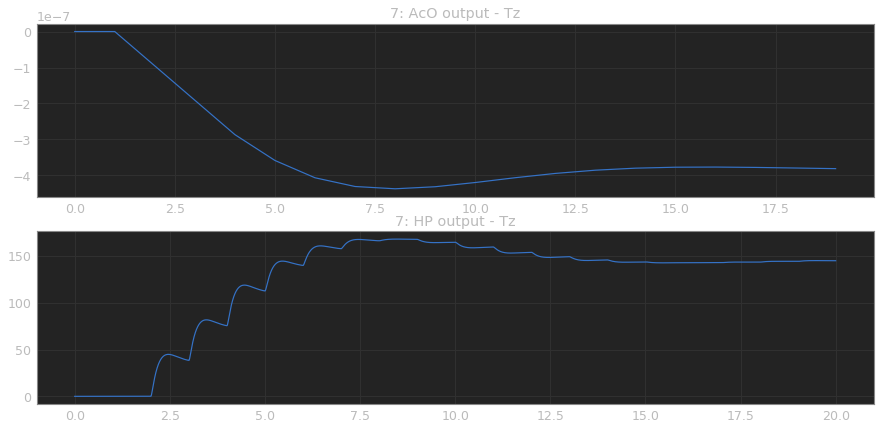

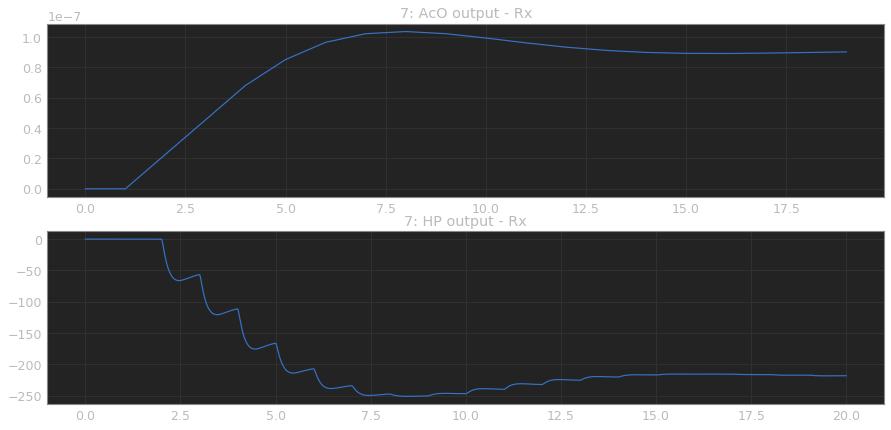

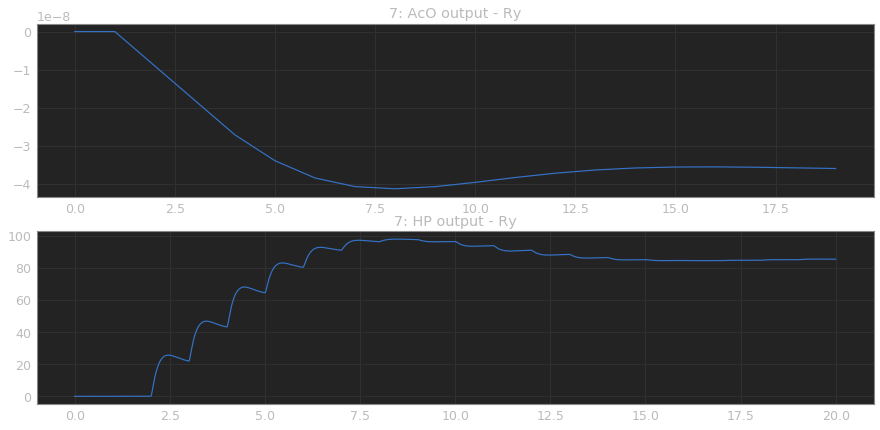

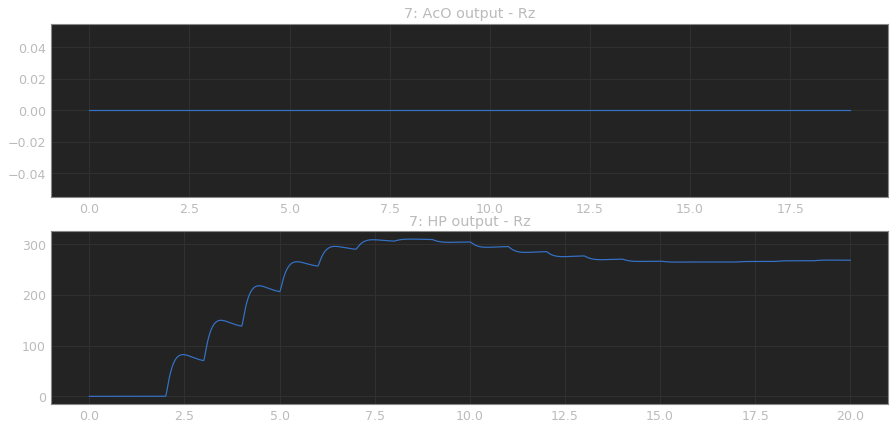

In [29]:
# Plot all AcO outputs and Hardpoints

table = ['Tx','Ty','Tz','Rx','Ry','Rz']
rbm_index = table.index(rbm)

for seg in range(7):
    for rbm in table:
        rbm_index = table.index(rbm)
        
        plt.figure(figsize=(15,7))
        ax1 = plt.subplot(2,1,1)
        ax1.set_title(str(seg + 1) + ': AcO output - ' + rbm)
        plt.plot(time[::2000], TRxyz[seg, rbm_index,:])
        ax2 = plt.subplot(2,1,2)
        ax2.set_title(str(seg + 1) + ': HP output - ' + rbm)
        plt.plot(time, M1Pos_out_r[:, rbm_index, seg])

plt.show()